<a href="https://colab.research.google.com/github/carlosrabazo/deeplearning/blob/main/Ejercicio%20Regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
# Creo un subconjunto de imágenes de entrenamiento que llamaré
# validation_images con las 10000 últimas imágenes del set de
# datos de entrenamiento (obviamente, lo mismo con las etiquetas
# correspondientes)
validation_images = train_images[50000:60000]
validation_labels = train_labels[50000:60000]
train_images = train_images[:50000]
train_labels = train_labels[:50000]

In [ ]:
def crea_modelo(regularizador):
  modelo = models.Sequential()
  if (regularizador==0):
    modelo.add(layers.Dense(512, name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
  elif regularizador==1:
    modelo.add(layers.Dense(512,kernel_regularizer=regularizers.l1(0.001) ,
                         name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
  elif regularizador==2:
    modelo.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.001) ,
                         name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
  elif regularizador==3:
    modelo.add(layers.Dense(512,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001) ,
                         name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
  elif regularizador==4:
    modelo.add(layers.Dense(512, name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
    modelo.add(layers.Dropout(0.5))
  else:
    print("Error: Código de regularizador debe estar entre 0 y 4")
    return
  modelo.add(layers.Dense(10, name='Capa_Salida_Softmax', activation='softmax'))
  modelo.summary()
  return modelo

In [ ]:
def compila_modelo(modelo): 
  modelo.compile(optimizer='rmsprop', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return modelo

In [ ]:
def entrena_modelo(modelo):
  historia = modelo.fit(train_images, train_labels, epochs=30, batch_size=128, 
            validation_data=(validation_images, validation_labels))
  return historia

In [ ]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
network0 = crea_modelo(0)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network0 = compila_modelo(network0)

In [ ]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 6s 15ms/step - loss: 0.2776 - accuracy: 0.9199 - val_loss: 0.1355 - val_accuracy: 0.9612
Epoch 2/30
391/391 [==============================] - 5s 14ms/step - loss: 0.1148 - accuracy: 0.9657 - val_loss: 0.0990 - val_accuracy: 0.9717
Epoch 3/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0753 - accuracy: 0.9773 - val_loss: 0.0919 - val_accuracy: 0.9738
Epoch 4/30
391/391 [==============================] - 4s 11ms/step - loss: 0.0545 - accuracy: 0.9840 - val_loss: 0.0784 - val_accuracy: 0.9759
Epoch 5/30
391/391 [==============================] - 4s 11ms/step - loss: 0.0404 - accuracy: 0.9880 - val_loss: 0.0768 - val_accuracy: 0.9778
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 0.0310 - accuracy: 0.9910 - val_loss: 0.0839 - val_accuracy: 0.9769
Epoch 7/30
391/391 [==============================] - 4s 11ms/step - loss: 0.0243 - accuracy: 0.9931 - val_loss: 0.0787 - val_accuracy: 0.9784

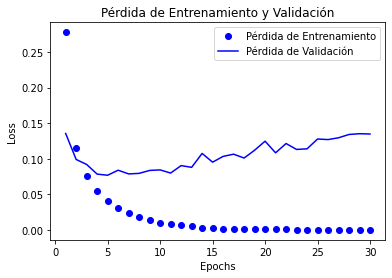

In [ ]:
pinta_perdida_entrenamiento_validacion(historia0)

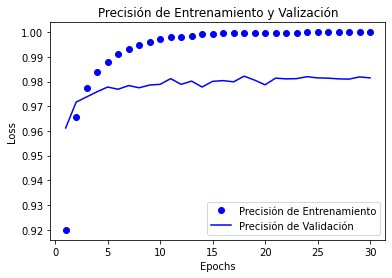

In [ ]:
pinta_precision_entrenamiento_validacion(historia0)

In [ ]:
network1 = crea_modelo(1)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network1 = compila_modelo(network1)

In [ ]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 6s 15ms/step - loss: 2.1375 - accuracy: 0.8437 - val_loss: 0.9926 - val_accuracy: 0.8937
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 0.9567 - accuracy: 0.8820 - val_loss: 0.8666 - val_accuracy: 0.9012
Epoch 3/30
391/391 [==============================] - 5s 12ms/step - loss: 0.8330 - accuracy: 0.9023 - val_loss: 0.7858 - val_accuracy: 0.9174
Epoch 4/30
391/391 [==============================] - 5s 13ms/step - loss: 0.7572 - accuracy: 0.9164 - val_loss: 0.7067 - val_accuracy: 0.9313
Epoch 5/30
391/391 [==============================] - 5s 13ms/step - loss: 0.7107 - accuracy: 0.9229 - val_loss: 0.6687 - val_accuracy: 0.9375
Epoch 6/30
391/391 [==============================] - 5s 12ms/step - loss: 0.6752 - accuracy: 0.9291 - val_loss: 0.6639 - val_accuracy: 0.9353
Epoch 7/30
391/391 [==============================] - 5s 12ms/step - loss: 0.6494 - accuracy: 0.9326 - val_loss: 0.7098 - val_accuracy: 0.9145

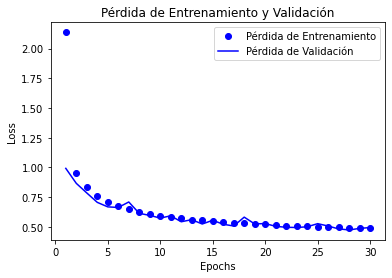

In [ ]:
pinta_perdida_entrenamiento_validacion(historia1)

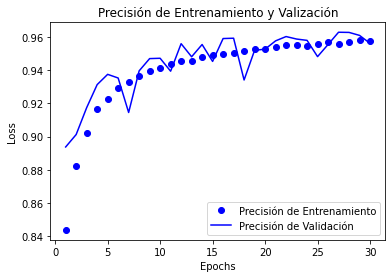

In [ ]:
pinta_precision_entrenamiento_validacion(historia1)

In [ ]:
network2 = crea_modelo(2)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network2 = compila_modelo(network2)

In [ ]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 5s 13ms/step - loss: 0.5242 - accuracy: 0.9126 - val_loss: 0.2980 - val_accuracy: 0.9551
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 0.2639 - accuracy: 0.9547 - val_loss: 0.2390 - val_accuracy: 0.9561
Epoch 3/30
391/391 [==============================] - 5s 12ms/step - loss: 0.2098 - accuracy: 0.9623 - val_loss: 0.2159 - val_accuracy: 0.9609
Epoch 4/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1885 - accuracy: 0.9666 - val_loss: 0.2073 - val_accuracy: 0.9613
Epoch 5/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1739 - accuracy: 0.9688 - val_loss: 0.1806 - val_accuracy: 0.9687
Epoch 6/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1642 - accuracy: 0.9711 - val_loss: 0.2032 - val_accuracy: 0.9604
Epoch 7/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1584 - accuracy: 0.9719 - val_loss: 0.1654 - val_accuracy: 0.9705

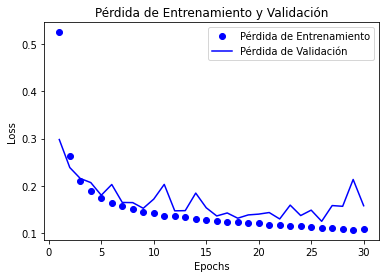

In [ ]:
pinta_perdida_entrenamiento_validacion(historia2)

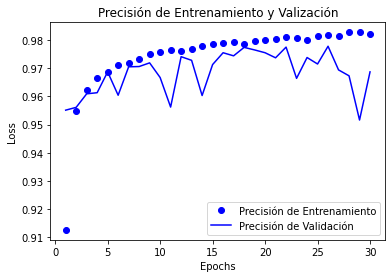

In [ ]:
pinta_precision_entrenamiento_validacion(historia2)

In [ ]:
network3 = crea_modelo(3)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network3 = compila_modelo(network3)

In [ ]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 6s 14ms/step - loss: 2.1546 - accuracy: 0.8398 - val_loss: 1.0322 - val_accuracy: 0.8805
Epoch 2/30
391/391 [==============================] - 5s 14ms/step - loss: 0.9800 - accuracy: 0.8781 - val_loss: 1.0171 - val_accuracy: 0.8409
Epoch 3/30
391/391 [==============================] - 6s 14ms/step - loss: 0.8616 - accuracy: 0.8972 - val_loss: 0.7792 - val_accuracy: 0.9212
Epoch 4/30
391/391 [==============================] - 6s 14ms/step - loss: 0.7866 - accuracy: 0.9131 - val_loss: 0.7911 - val_accuracy: 0.9059
Epoch 5/30
391/391 [==============================] - 5s 14ms/step - loss: 0.7355 - accuracy: 0.9208 - val_loss: 0.7148 - val_accuracy: 0.9261
Epoch 6/30
391/391 [==============================] - 6s 14ms/step - loss: 0.6975 - accuracy: 0.9271 - val_loss: 0.6607 - val_accuracy: 0.9350
Epoch 7/30
391/391 [==============================] - 6s 16ms/step - loss: 0.6684 - accuracy: 0.9341 - val_loss: 0.7162 - val_accuracy: 0.9194

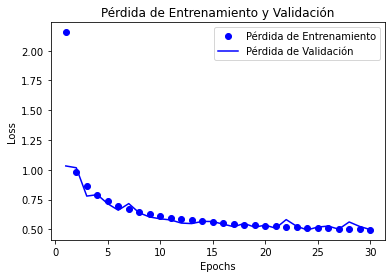

In [ ]:
pinta_perdida_entrenamiento_validacion(historia3)

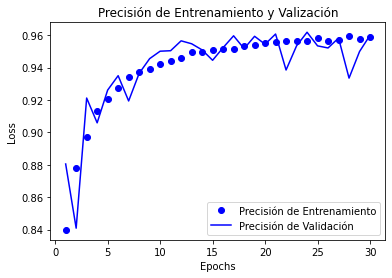

In [ ]:
pinta_precision_entrenamiento_validacion(historia3)

In [ ]:
network4 = crea_modelo(4)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network4 = compila_modelo(network4)

In [ ]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 5s 12ms/step - loss: 0.3457 - accuracy: 0.8973 - val_loss: 0.1533 - val_accuracy: 0.9578
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1697 - accuracy: 0.9491 - val_loss: 0.1145 - val_accuracy: 0.9656
Epoch 3/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1299 - accuracy: 0.9615 - val_loss: 0.0965 - val_accuracy: 0.9727
Epoch 4/30
391/391 [==============================] - 5s 12ms/step - loss: 0.1069 - accuracy: 0.9681 - val_loss: 0.0893 - val_accuracy: 0.9747
Epoch 5/30
391/391 [==============================] - 5s 14ms/step - loss: 0.0913 - accuracy: 0.9736 - val_loss: 0.0811 - val_accuracy: 0.9770
Epoch 6/30
391/391 [==============================] - 6s 16ms/step - loss: 0.0823 - accuracy: 0.9753 - val_loss: 0.0844 - val_accuracy: 0.9767
Epoch 7/30
391/391 [==============================] - 5s 12ms/step - loss: 0.0733 - accuracy: 0.9786 - val_loss: 0.0786 - val_accuracy: 0.9783

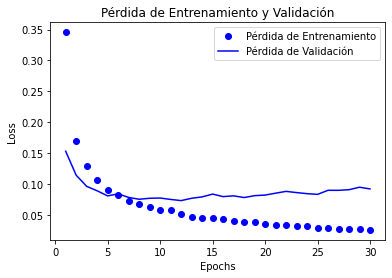

In [ ]:
pinta_perdida_entrenamiento_validacion(historia4)

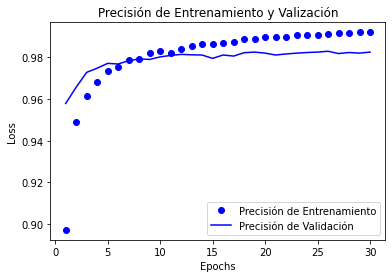

In [ ]:
pinta_precision_entrenamiento_validacion(historia4)

In [ ]:
network5 = crea_modelo(5)

Error: Código de regularizador debe estar entre 0 y 4
